In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.models import Model, Sequential
from keras.layers import *
from keras.optimizers import Adam

import tensorflow as tf
import numpy as np

import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split


In [21]:
print(keras.__version__)
print(tf.__version__)


2.0.8
1.1.0


### Lets import our dataset

In [22]:
from keras.datasets import imdb
from keras import preprocessing
# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words
# (among top max_features most common words)
maxlen = 25
# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)



In [23]:
print(x_train.shape)
print(x_test.shape)



(25000,)
(25000,)


In [24]:
print(x_test[0])
print(y_test[0])


[1, 89, 27, 2, 9289, 17, 199, 132, 5, 4191, 16, 1339, 24, 8, 760, 4, 1385, 7, 4, 22, 1368, 2, 16, 5149, 17, 1635, 7, 2, 1368, 9, 4, 1357, 8, 14, 991, 13, 877, 38, 19, 27, 239, 13, 100, 235, 61, 483, 2, 4, 7, 4, 20, 131, 1102, 72, 8, 14, 251, 27, 1146, 7, 308, 16, 735, 1517, 17, 29, 144, 28, 77, 2305, 18, 12]
1


In [25]:
# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [26]:
print(x_test[0])
print(y_test[0])
print(x_train[0])


[   4    7    4   20  131 1102   72    8   14  251   27 1146    7  308   16
  735 1517   17   29  144   28   77 2305   18   12]
1
[  92   25  104    4  226   65   16   38 1334   88   12   16  283    5   16
 4472  113  103   32   15   16 5345   19  178   32]


Counting the words in the dataset

In [27]:
nums = sorted(list(set(x_train.reshape(x_train.shape[0]*x_train.shape[1]))))
print("Total words in data set: ", len(nums))

Total words in data set:  9744


Just keeping the 10k most frequent words

In [28]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer,
# our activations have shape `(samples, maxlen, 8)`.
# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())
# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 25, 8)             80000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 80,201
Trainable params: 80,201
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 3s - loss: 0.6605 - acc: 0.6421 - val_loss: 0.5995 - val_acc: 0.7154
Epoch 2/10
20000/20000 [==============================] - 3s - loss: 0.5191 - acc: 0.7677 - val_loss: 0.5056 - val_acc: 0.7508
Epoch 3/10
20000/20000 [==============================] - 3s - loss: 0.4359 - acc: 0.8045 - val_los

### Simple RNN model for IMDB analysis



In [29]:
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000 # number of words to consider as features
maxlen = 500 # cut texts after this number of words (among top max_features most common words)
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [30]:
from keras.layers import Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 18s - loss: 0.6492 - acc: 0.6146 - val_loss: 0.4988 - val_acc: 0.8036
Epoch 2/10
20000/20000 [==============================] - 18s - loss: 0.4173 - acc: 0.8262 - val_loss: 0.3933 - val_acc: 0.8368
Epoch 3/10
20000/20000 [==============================] - 18s - loss: 0.2910 - acc: 0.8823 - val_loss: 0.3946 - val_acc: 0.8404
Epoch 4/10
20000/20000 [==============================] - 18s - loss: 0.2230 - acc: 0.9139 - val_loss: 0.4261 - val_acc: 0.8268
Epoch 5/10
20000/20000 [==============================] - 18s - loss: 0.1563 - acc: 0.9425 - val_loss: 0.5032 - val_acc: 0.8136
Epoch 6/10
20000/20000 [==============================] - 18s - loss: 0.1028 - acc: 0.9651 - val_loss: 0.7184 - val_acc: 0.7932
Epoch 7/10
20000/20000 [==============================] - 18s - loss: 0.0621 - acc: 0.9800 - val_loss: 0.5278 - val_acc: 0.8272
Epoch 8/10
20000/20000 [==============================]

Plot the result

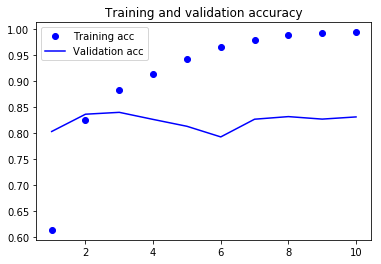

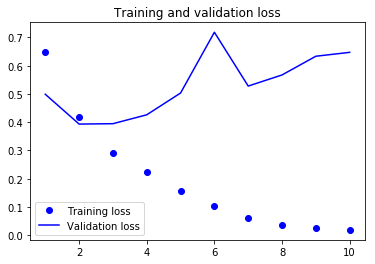

In [31]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [35]:
preds = model.predict(input_test[100:105])

In [55]:
preds

array([[ 0.00147909],
       [ 0.00214051],
       [ 0.99489319],
       [ 0.01012734],
       [ 0.08949097]], dtype=float32)

In [56]:
y_test[100:105]

array([0, 1, 1, 0, 1], dtype=int64)

In [76]:
print(preds.shape)
p = np.around(preds).astype(np.int64)
p

z = y_test[100:105] - p.transpose()
print(z)
np.count_nonzero(z)

(5, 1)
[[0 1 0 0 1]]


2

In [78]:
predsAll = model.predict(input_test) 
p = np.around(predsAll).astype(np.int64)

z = y_test - p.transpose() 
print(len(z[0])) 
flse = np.count_nonzero(z) 
print('Test set accuracy = ', 100 - flse/len(z[0])*100, '%')


25000
Test set accuracy =  72.392 %


# LSTM and IMDB

In [79]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 105s - loss: 0.5158 - acc: 0.7553 - val_loss: 0.3672 - val_acc: 0.8524
Epoch 2/10
20000/20000 [==============================] - 104s - loss: 0.2882 - acc: 0.8889 - val_loss: 0.3111 - val_acc: 0.8772
Epoch 3/10
20000/20000 [==============================] - 104s - loss: 0.2322 - acc: 0.9131 - val_loss: 0.5005 - val_acc: 0.8068
Epoch 4/10
20000/20000 [==============================] - 104s - loss: 0.1957 - acc: 0.9280 - val_loss: 0.3645 - val_acc: 0.8750
Epoch 5/10
20000/20000 [==============================] - 107s - loss: 0.1782 - acc: 0.9356 - val_loss: 0.3748 - val_acc: 0.8386
Epoch 6/10
20000/20000 [==============================] - 114s - loss: 0.1517 - acc: 0.9453 - val_loss: 0.3486 - val_acc: 0.8760
Epoch 7/10
20000/20000 [==============================] - 116s - loss: 0.1459 - acc: 0.9463 - val_loss: 0.3350 - val_acc: 0.8644
Epoch 8/10
20000/20000 [========================

In [84]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
modelGRU = Sequential()
modelGRU.add(Embedding(max_features, 32))
modelGRU.add(layers.GRU(32))
modelGRU.add(layers.Dense(1))
modelGRU.compile(optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['acc'])
history = modelGRU.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 83s - loss: 0.7253 - acc: 0.6558 - val_loss: 0.5741 - val_acc: 0.7222
Epoch 2/10
20000/20000 [==============================] - 83s - loss: 0.5337 - acc: 0.7656 - val_loss: 0.6531 - val_acc: 0.7004
Epoch 3/10
20000/20000 [==============================] - 82s - loss: 0.4850 - acc: 0.7557 - val_loss: 0.4934 - val_acc: 0.7670
Epoch 4/10
20000/20000 [==============================] - 82s - loss: 0.4728 - acc: 0.7630 - val_loss: 0.6879 - val_acc: 0.6498
Epoch 5/10
20000/20000 [==============================] - 83s - loss: 0.4782 - acc: 0.7490 - val_loss: 0.4952 - val_acc: 0.7698
Epoch 6/10
20000/20000 [==============================] - 83s - loss: 0.4136 - acc: 0.7942 - val_loss: 0.4848 - val_acc: 0.7952
Epoch 7/10
20000/20000 [==============================] - 83s - loss: 0.3667 - acc: 0.8172 - val_loss: 0.5062 - val_acc: 0.7896
Epoch 8/10
20000/20000 [==============================]

In [87]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
modelGRU_D = Sequential()
modelGRU_D.add(Embedding(max_features, 32))
modelGRU_D.add(layers.GRU(32,
        dropout=0.2,
        recurrent_dropout=0.2))
modelGRU_D.add(layers.Dense(1))
modelGRU_D.compile(optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['acc'])
history_D = modelGRU_D.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 87s - loss: 0.7113 - acc: 0.6260 - val_loss: 0.5902 - val_acc: 0.7172
Epoch 2/10
20000/20000 [==============================] - 85s - loss: 0.5813 - acc: 0.7378 - val_loss: 0.6525 - val_acc: 0.7224
Epoch 3/10
20000/20000 [==============================] - 85s - loss: 0.5495 - acc: 0.7602 - val_loss: 0.5987 - val_acc: 0.7332
Epoch 4/10
20000/20000 [==============================] - 85s - loss: 0.5380 - acc: 0.7689 - val_loss: 0.5496 - val_acc: 0.7522
Epoch 5/10
20000/20000 [==============================] - 89s - loss: 0.5232 - acc: 0.7636 - val_loss: 0.5866 - val_acc: 0.7374
Epoch 6/10
20000/20000 [==============================] - 86s - loss: 0.5019 - acc: 0.7652 - val_loss: 0.5802 - val_acc: 0.7484
Epoch 7/10
20000/20000 [==============================] - 85s - loss: 0.5167 - acc: 0.7418 - val_loss: 0.6372 - val_acc: 0.7376
Epoch 8/10
20000/20000 [==============================]

In [ ]:
modelB = Sequential()
modelB.add(layers.Embedding(max_features, 32))
modelB.add(layers.Bidirectional(layers.LSTM(32)))
modelB.add(layers.Dense(1, activation='sigmoid'))
modelB.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
historyB = modelB.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 247s - loss: 0.5573 - acc: 0.7206 - val_loss: 0.3914 - val_acc: 0.8532
Epoch 2/10
 7808/20000 [==========>...................] - ETA: 123s - loss: 0.3646 - acc: 0.8517

In [ ]:
modelB_ = Sequential()
modelB_.add(layers.Embedding(max_features, 128))
modelB_.add(layers.Bidirectional(layers.LSTM(128)))
modelB_.add(layers.Dense(1, activation='sigmoid'))
modelB_.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
historyB_ = modelB_.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

In [ ]:
predsAll = modelB_.predict(input_test) 
p = np.around(predsAll).astype(np.int64)

z = y_test - p.transpose() 
print(len(z[0])) 
flse = np.count_nonzero(z) 
print('Test set accuracy = ', 100 - flse/len(z[0])*100, '%')